<center><h1>Guan_Haoyu_HW6</h1></center>

Name: Haoyu Guan
<br>
Github Username: ghyharry
<br>
USC ID: 7418934031
<br>
I need to use 1 late day

## 1. Tree-Based Methods

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold

C:\Users\guanh\anaconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### (a) Download the APS Failure data

In [2]:
test = pd.read_csv('../data/aps_failure_test_set.csv', skiprows = 20, na_values = "na")
train = pd.read_csv('../data/aps_failure_training_set.csv', skiprows = 20, na_values = "na")

In [3]:
ytrain = train["class"]
xtrain = train.drop("class", axis=1)
ytest = test["class"]
xtest = test.drop("class", axis=1)


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

The most common techniques are using mean, median, mode, OR using value from prediction by KNN regressor, linear regressor, etc.to fill that NA value.

In [4]:
xtrain = xtrain.fillna(xtrain.mean())
xtest = xtest.fillna(xtest.mean())
xtrain

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


#### (ii) Calculate the coefficient of variation

In [5]:
x = pd.concat([xtrain,xtest], ignore_index = True)
x

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852,0.772065,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,18,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,79636,0.772065,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,110,0.772065,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [6]:
df = pd.DataFrame()
for column in x.columns:
    df.loc[column, 'CV'] = x[column].std()/x[column].mean()
df

,CV
aa_000,4.328608
ab_000,2.178397
ac_000,2.167648
ad_000,206.786809
ae_000,22.293998
...,...
ee_007,4.885086
ee_008,3.335019
ee_009,5.753917
ef_000,47.925135


#### (iii) Plot a correlation matrix

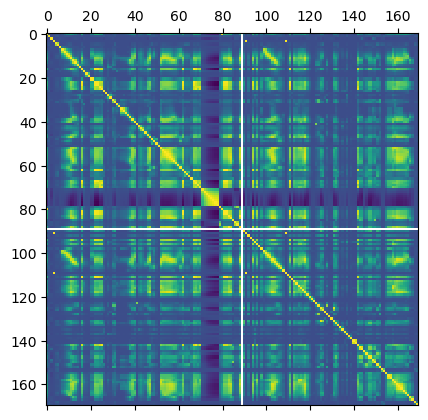

In [7]:

plt.matshow(x.corr())

#### (iv) Make scatter plots and box plots

In [8]:
df = df.sort_values(by='CV', ascending=False)
highestfeature= df.head(int(np.sqrt(170)))
highestfeature

,CV
cf_000,207.335930
co_000,206.941549
ad_000,206.786809
cs_009,192.498194
dj_000,122.169994
as_000,113.895899
dh_000,112.666588
df_000,111.279258
ag_000,91.465520
au_000,86.090347


In [9]:

x['class'] = pd.concat([ytrain, ytest], ignore_index = True)
xy = x.replace(["neg","pos"],["0","1"])
xy

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,0
1,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,0
2,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,0
3,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,0
4,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852,0.772065,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0,0
75996,18,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,0
75997,79636,0.772065,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0,0
75998,110,0.772065,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0,0


In [10]:
#sns.pairplot(data = xy, vars = highestfeature.index, hue = 'class', diag_kind=None)
#this takes too long, the plot is in next cell

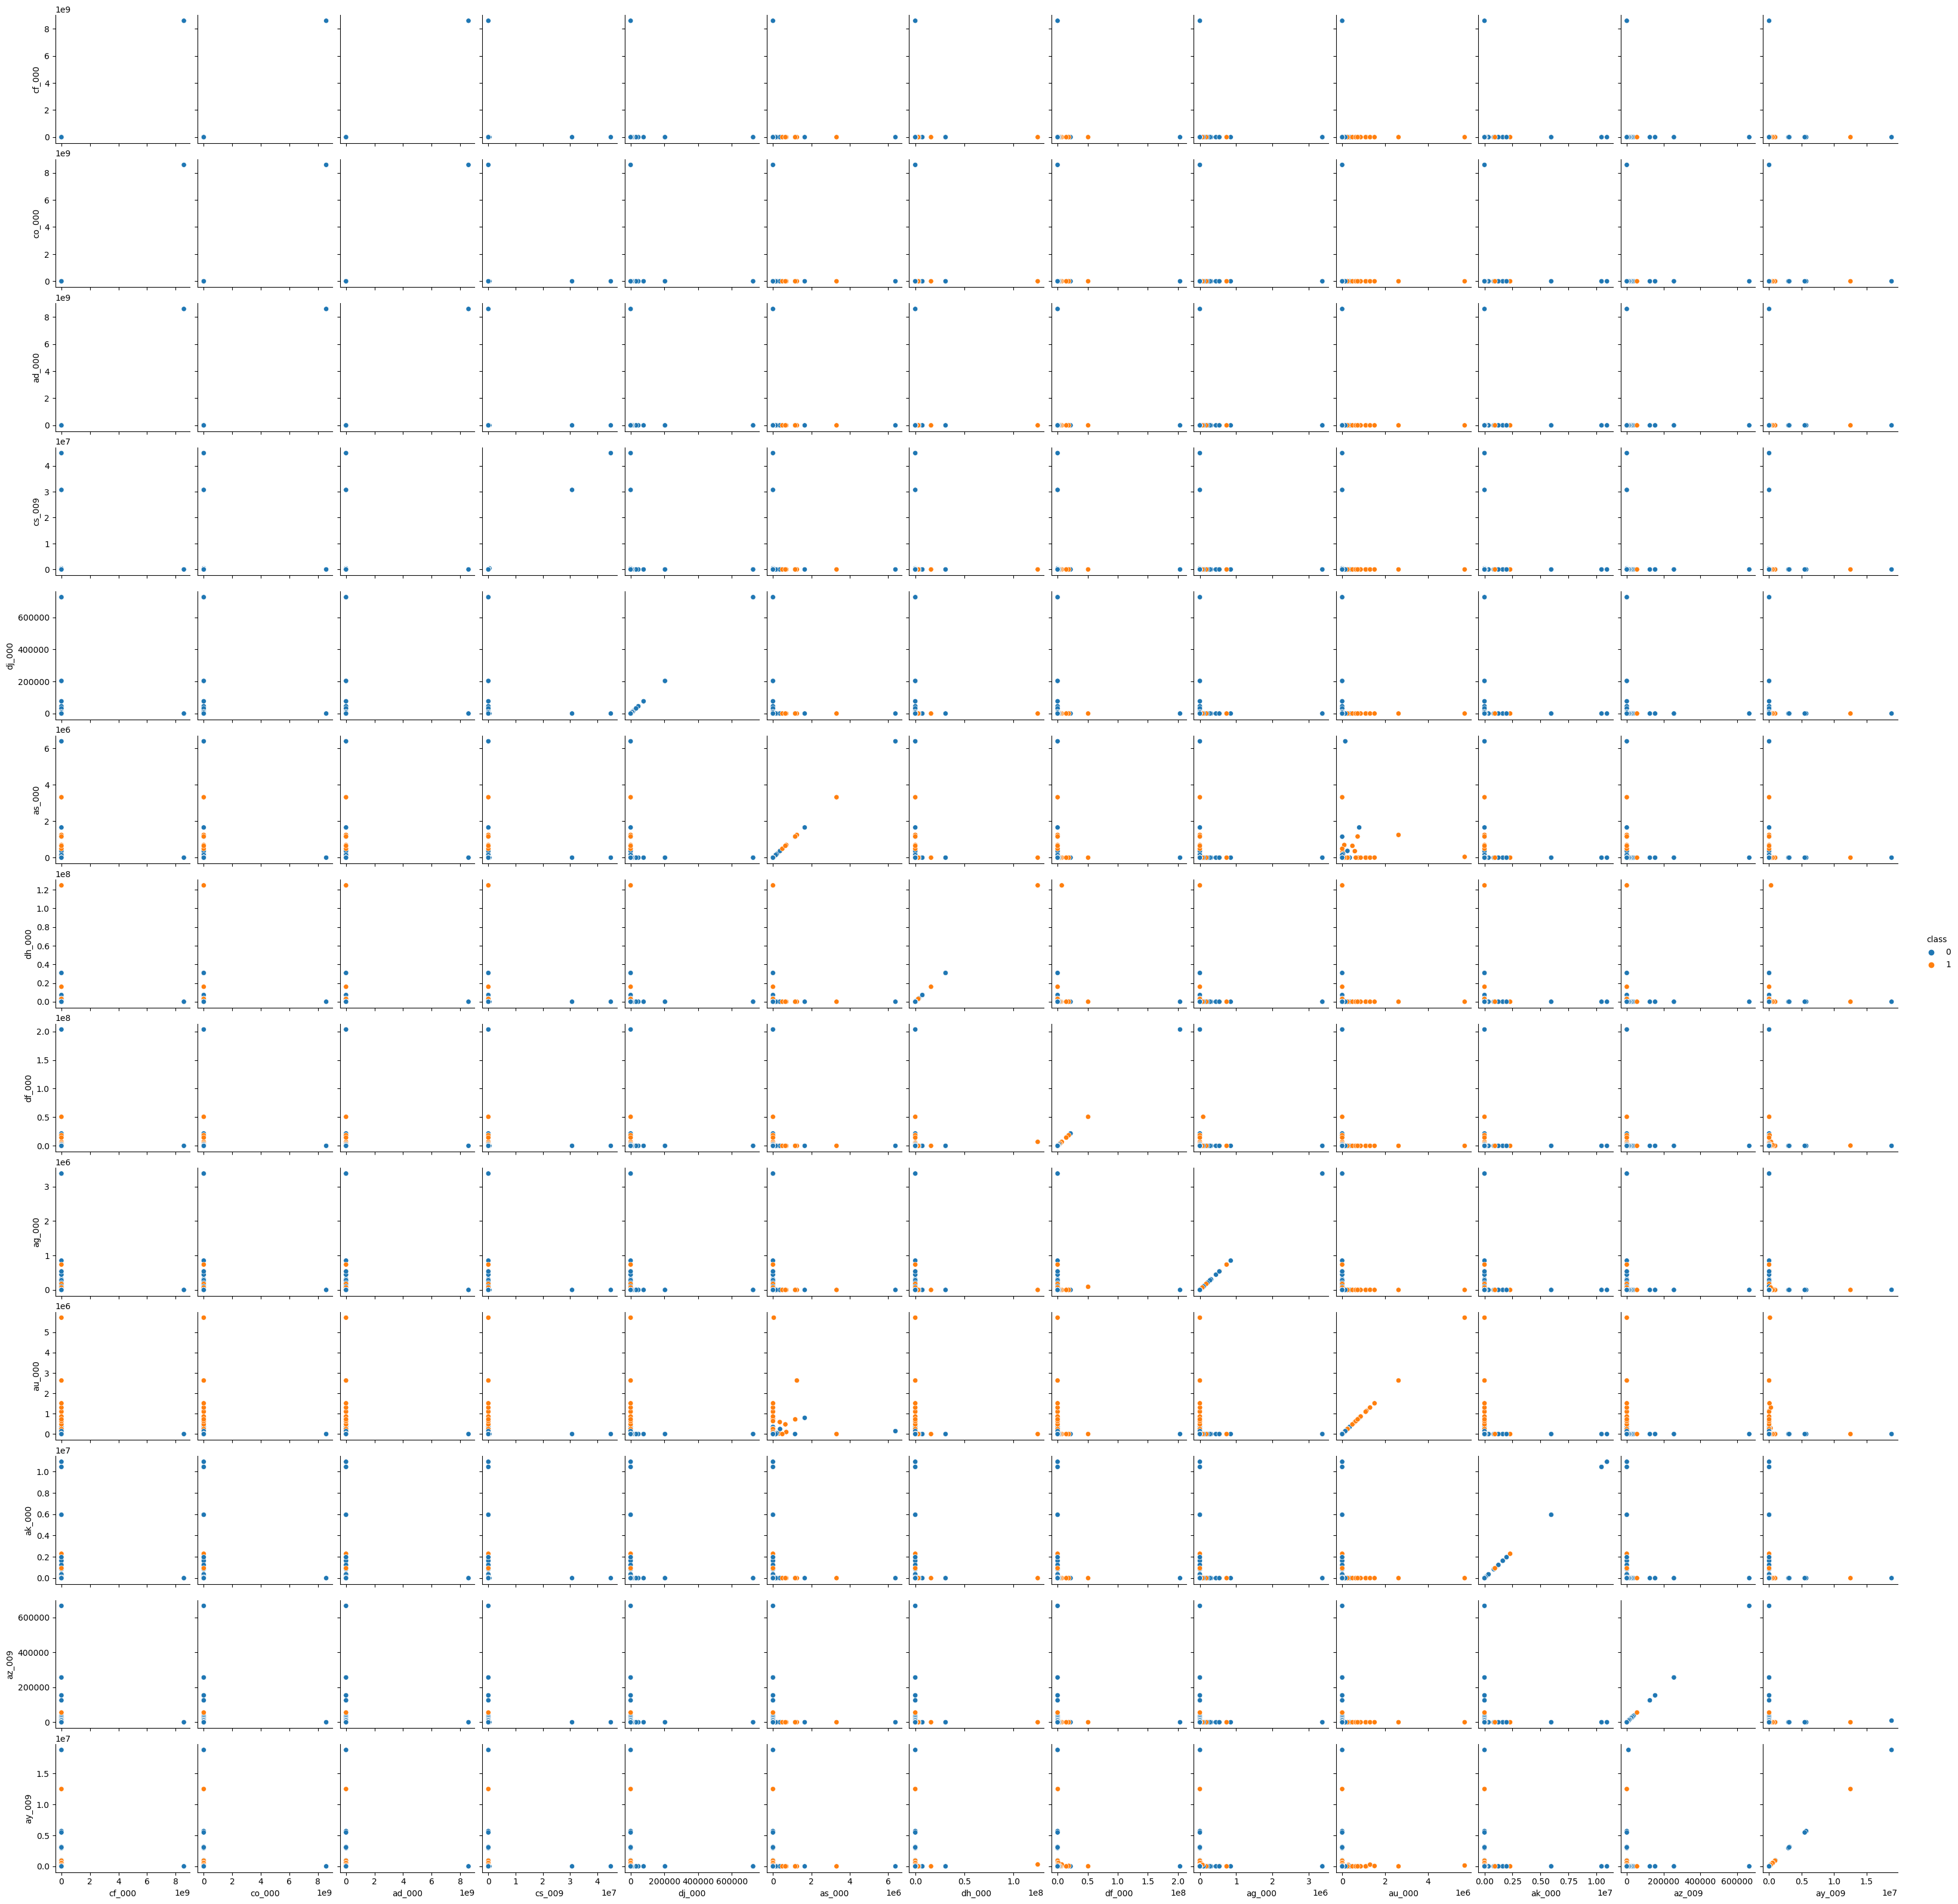

In [11]:
from IPython.display import Image
Image("picture.png")

[None]

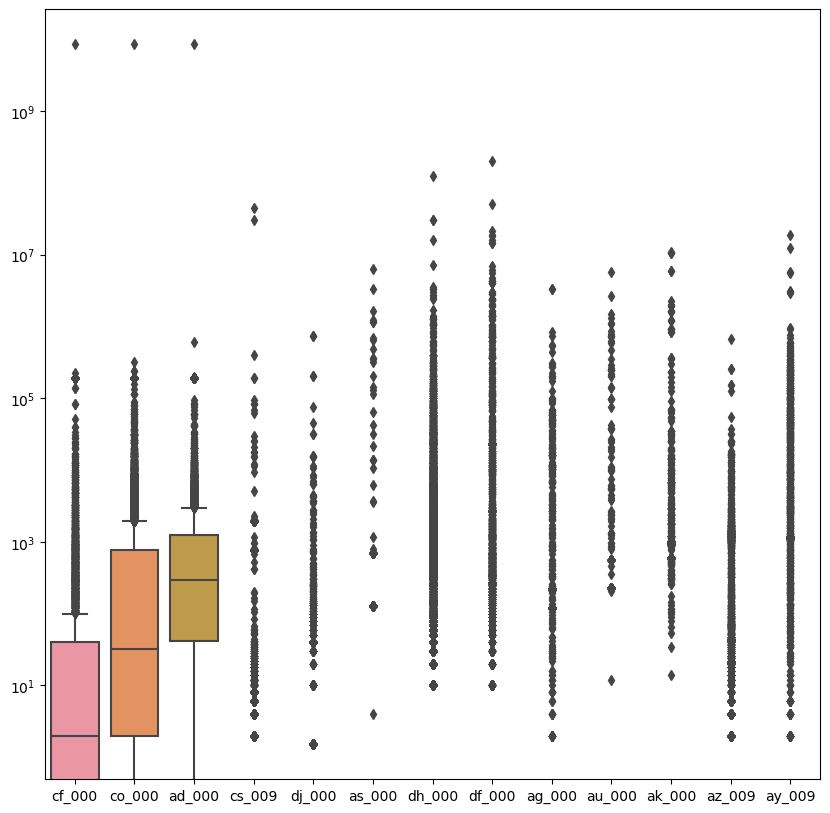

In [12]:
fig, ax = plt.subplots(figsize = (10, 10))
plotb =sns.boxplot(data=xy[highestfeature.index], ax = ax)
plotb.set(yscale='log')

#### (v) Is this data set imbalanced?

In [13]:
xy["class"].value_counts()

0    74625
1     1375
Name: class, dtype: int64

The data set is highly imbalanced.

### (c) Train a random forest

In [14]:
randomf = RandomForestClassifier(max_depth=7, random_state=4, oob_score = True)
randomf.fit(xtrain, ytrain)
ytrainpred = randomf.predict(xtrain)
ytrainprob = randomf.predict_proba(xtrain)
ytestpred = randomf.predict(xtest)
ytestprob = randomf.predict_proba(xtest)


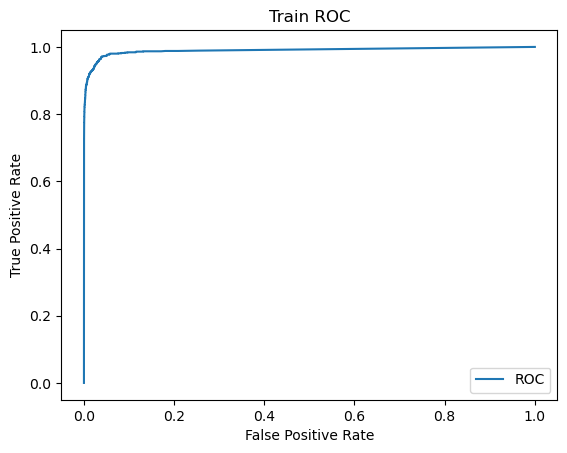

Train AUC:  0.9896715338983051
confusion matrix
[[58994     6]
 [  307   693]]


In [15]:
matrix = confusion_matrix(ytrain,ytrainpred)
acc = accuracy_score(ytrain,ytrainpred)
fpr, tpr, thres = roc_curve(ytrain, ytrainprob[:, 1], pos_label='pos')
plt.plot(fpr, tpr, label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train ROC")
plt.legend()
plt.show()
print("Train AUC: ",auc(fpr, tpr))
print("confusion matrix")
print(matrix)

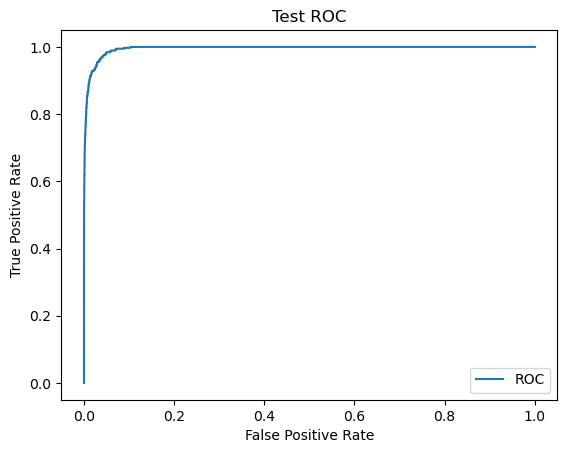

Test AUC:  0.9951784106666668
confusion matrix
[[15611    14]
 [  148   227]]


In [16]:
matrix = confusion_matrix(ytest,ytestpred)
acc = accuracy_score(ytest,ytestpred)
fpr, tpr, thres = roc_curve(ytest, ytestprob[:, 1], pos_label='pos')
plt.plot(fpr, tpr, label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC")
plt.legend()
plt.show()
print("Test AUC: ",auc(fpr, tpr))
print("confusion matrix")
print(matrix)

In [17]:
print("test error",1-accuracy_score(ytest,ytestpred))

test error 0.01012500000000005


In [18]:
print("OOB",1 - randomf.oob_score_)

OOB 0.007916666666666683


The Out of Bag error is a little smaller than test error.

### (d) Research class imbalance in random forest

In [19]:
randomf = RandomForestClassifier(max_depth=7, random_state=4, oob_score = True, class_weight='balanced')
randomf.fit(xtrain, ytrain)
ytrainpred = randomf.predict(xtrain)
ytrainprob = randomf.predict_proba(xtrain)
ytestpred = randomf.predict(xtest)
ytestprob = randomf.predict_proba(xtest)

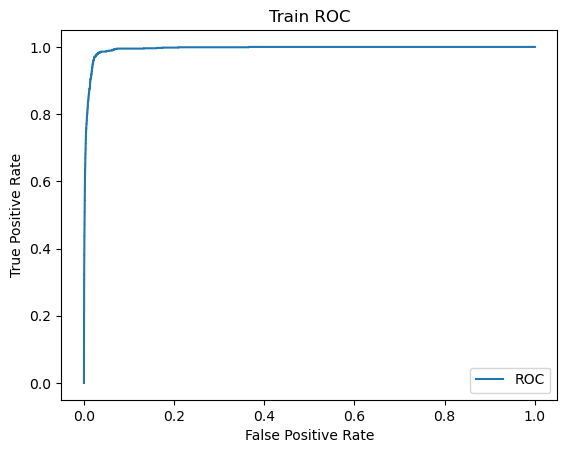

Train AUC:  0.9944142457627119
confusion matrix
[[57356  1644]
 [   22   978]]


In [20]:
matrix = confusion_matrix(ytrain,ytrainpred)
acc = accuracy_score(ytrain,ytrainpred)
fpr, tpr, thres = roc_curve(ytrain, ytrainprob[:, 1], pos_label='pos')
plt.plot(fpr, tpr, label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train ROC")
plt.legend()
plt.show()
print("Train AUC: ",auc(fpr, tpr))
print("confusion matrix")
print(matrix)

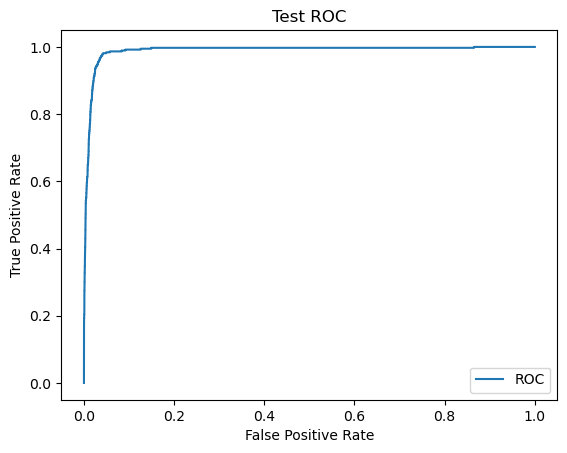

Test AUC:  0.9888661333333334
confusion matrix
[[15198   427]
 [   22   353]]


In [21]:
matrix = confusion_matrix(ytest,ytestpred)
acc = accuracy_score(ytest,ytestpred)
fpr, tpr, thres = roc_curve(ytest, ytestprob[:, 1], pos_label='pos')
plt.plot(fpr, tpr, label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC")
plt.legend()
plt.show()
print("Test AUC: ",auc(fpr, tpr))
print("confusion matrix")
print(matrix)

In [22]:
print("test error",1-accuracy_score(ytest,ytestpred))

test error 0.02806249999999999


In [23]:
print("OOB",1 - randomf.oob_score_)

OOB 0.030100000000000016


We got even worse result by class_weight='balanced', both OOB and test error are larger than c).

### (e) XGBoost and Model Trees

In [24]:
ytrainxgb = ytrain.replace(["neg","pos"],[0,1])
ytestxgb = ytest.replace(["neg","pos"],[0,1])
parameters = {'reg_alpha' :[0.001, 0.01, 0.1, 1, 10]}
xgbclf = xgb.XGBClassifier(objective = 'binary:logistic', max_depth=5)
clf = GridSearchCV(xgbclf, parameters, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 5))
clf.fit(xtrain, ytrainxgb)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_...
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'reg_alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [26]:
bestest = clf.best_estimator_

ytrainpred = bestest.predict(xtrain)
ytrainprob = bestest.predict_proba(xtrain)
ytestpred = bestest.predict(xtest)
ytestprob = bestest.predict_proba(xtest)

trainacc = accuracy_score(ytrainxgb, ytrainpred)
testacc = accuracy_score(ytestxgb, ytestpred)

print('Best Alpha:', clf.best_params_)
print('Best Train Error:',1-trainacc)
print('Test Error:', 1-testacc)

Best Alpha: {'reg_alpha': 1}
Best Train Error: 4.999999999999449e-05
Test Error: 0.0061875000000000124


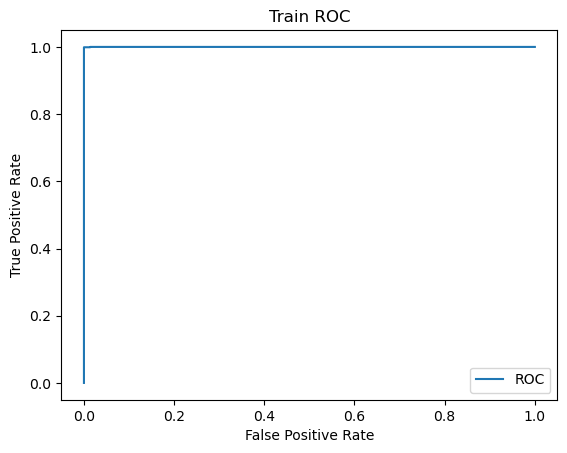

Train AUC:  0.9999862796610169
confusion matrix
[[59000     0]
 [    3   997]]


In [28]:
matrix = confusion_matrix(ytrainxgb,ytrainpred)
acc = accuracy_score(ytrainxgb,ytrainpred)
fpr, tpr, thres = roc_curve(ytrainxgb, ytrainprob[:, 1], pos_label=1)
plt.plot(fpr, tpr, label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train ROC")
plt.legend()
plt.show()
print("Train AUC: ",auc(fpr, tpr))
print("confusion matrix")
print(matrix)

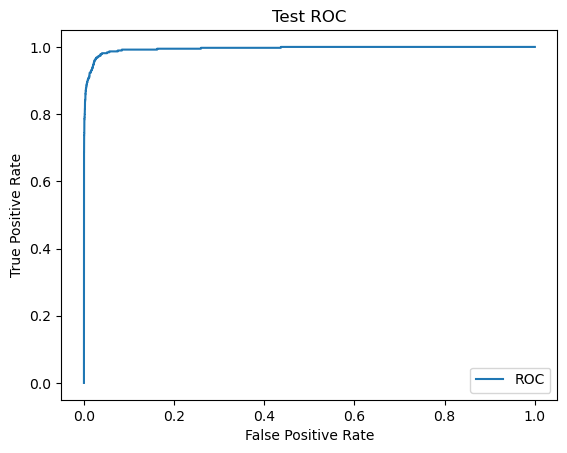

Test AUC:  0.9948648106666667
confusion matrix
[[15610    15]
 [   84   291]]


In [29]:
matrix = confusion_matrix(ytestxgb,ytestpred)
acc = accuracy_score(ytestxgb,ytestpred)
fpr, tpr, thres = roc_curve(ytestxgb, ytestprob[:, 1], pos_label=1)
plt.plot(fpr, tpr, label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC")
plt.legend()
plt.show()
print("Test AUC: ",auc(fpr, tpr))
print("confusion matrix")
print(matrix)

### (f) Use SMOTE to pre-process your data

In [31]:
smote = SMOTE()
xsmote, ysmote = smote.fit_resample(xtrain, ytrainxgb)
clf.fit(xsmote, ysmote)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_...
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'reg_alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [32]:
bestest = clf.best_estimator_

ytrainpred = bestest.predict(xtrain)
ytrainprob = bestest.predict_proba(xtrain)
ytestpred = bestest.predict(xtest)
ytestprob = bestest.predict_proba(xtest)

trainacc = accuracy_score(ytrainxgb, ytrainpred)
testacc = accuracy_score(ytestxgb, ytestpred)

print('Best Alpha:', clf.best_params_)
print('Best Train Error:',1-trainacc)
print('Test Error:', 1-testacc)

Best Alpha: {'reg_alpha': 1}
Best Train Error: 0.00013333333333331865
Test Error: 0.017625000000000002


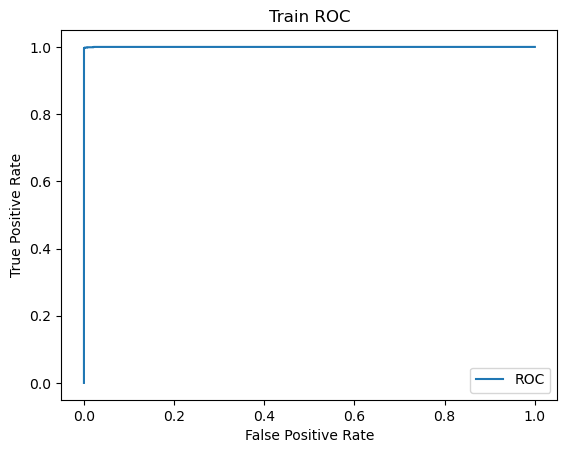

Train AUC:  0.9999683644067796
confusion matrix
[[58999     1]
 [    7   993]]


In [33]:
matrix = confusion_matrix(ytrainxgb,ytrainpred)
acc = accuracy_score(ytrainxgb,ytrainpred)
fpr, tpr, thres = roc_curve(ytrainxgb, ytrainprob[:, 1], pos_label=1)
plt.plot(fpr, tpr, label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train ROC")
plt.legend()
plt.show()
print("Train AUC: ",auc(fpr, tpr))
print("confusion matrix")
print(matrix)

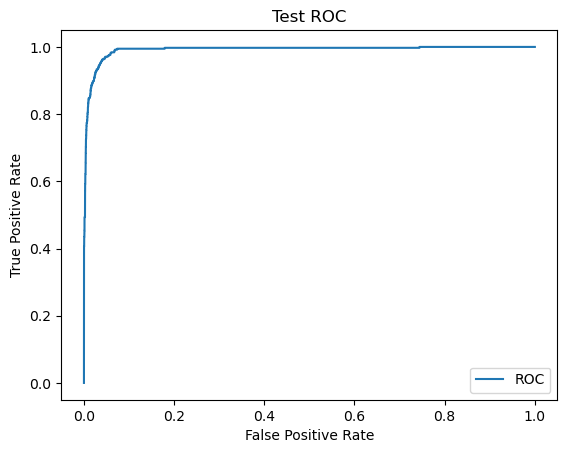

Test AUC:  0.9912367786666666
confusion matrix
[[15391   234]
 [   48   327]]


In [34]:
matrix = confusion_matrix(ytestxgb,ytestpred)
acc = accuracy_score(ytestxgb,ytestpred)
fpr, tpr, thres = roc_curve(ytestxgb, ytestprob[:, 1], pos_label=1)
plt.plot(fpr, tpr, label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC")
plt.legend()
plt.show()
print("Test AUC: ",auc(fpr, tpr))
print("confusion matrix")
print(matrix)

SMOTE did not improve the performance of our XGB model. Our test error increased.

## 2. ISLR 6.6.3

a). Steadily decrease. As s getting larger, we penalty on βj and the model eventually becomes a least squares regressor. The model would have more flexibility and decrease the bias, as well as the Train RSS. 
<br>
b). Decrease initially, and then eventually start increasing in a U shape. As flexibility continually increase, the model will overfit and test RSS will increase.
<br>
c). Steadily increase. As flexibility continually increase, varience Steadily increase.
<br>
d). Steadily decrease. As flexibility continually increase, bias Steadily increase.
<br>
e). Remain constant. Irreducible error is irreducible and independently.

## 3. ISLR 6.6.5

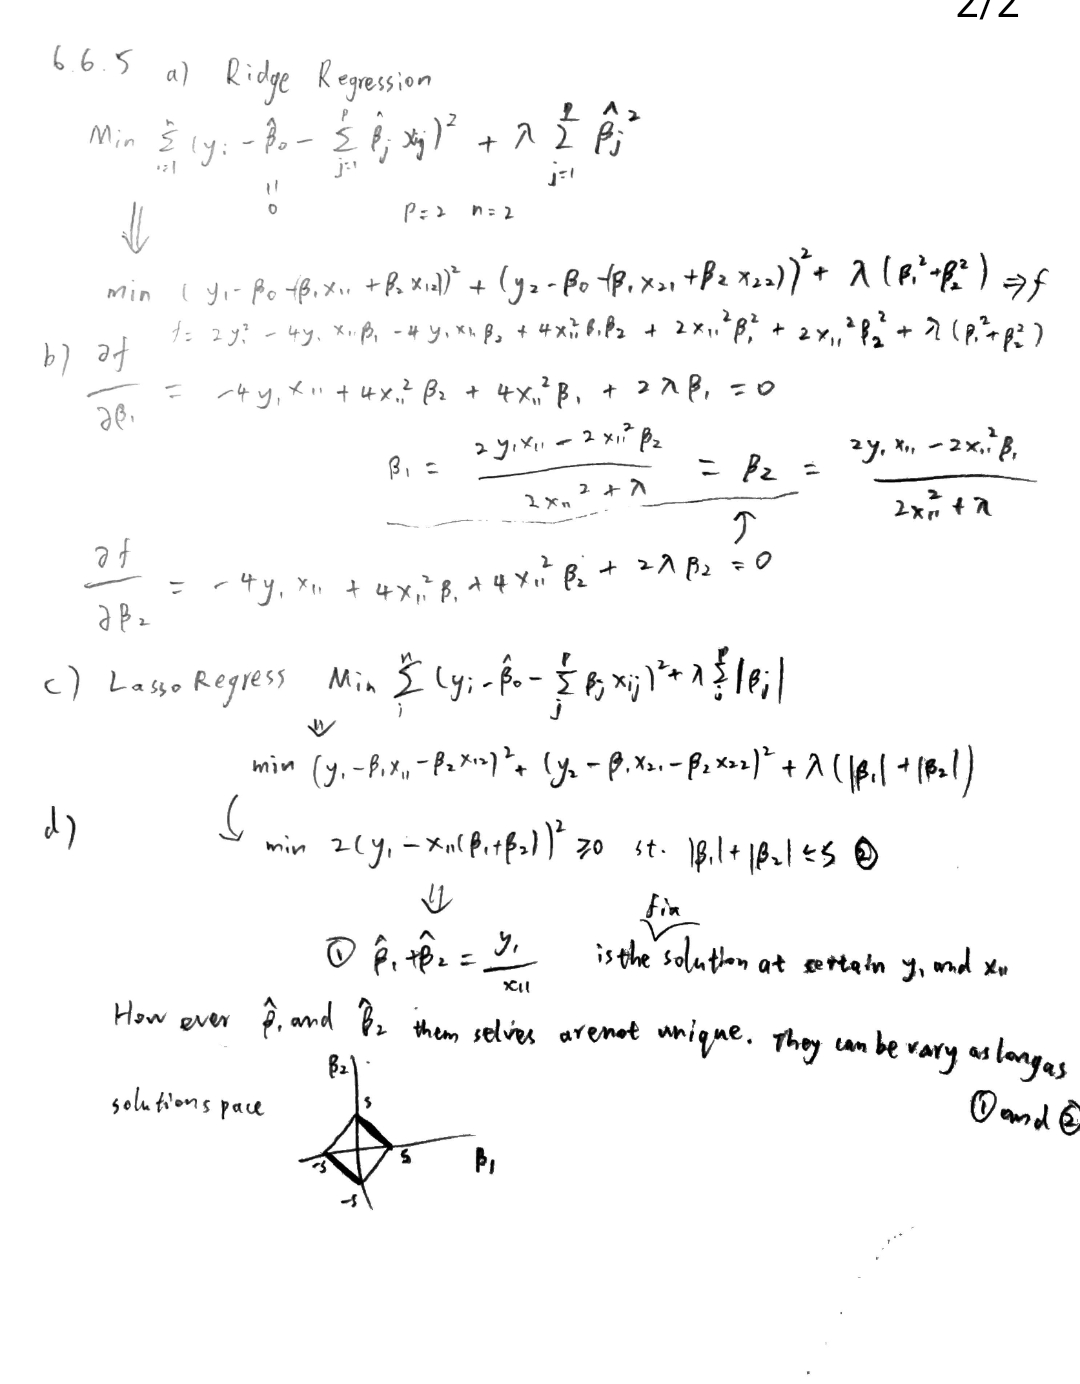

In [35]:
Image("665.jpg")

## 4. ISLR 8.4.5

With majority vote approach, we have 6 red and 4 green so we classify x as red.
With average probability approach, our average probability is 0.45, we classify x as green.

## 5. ISLR 9.7.3

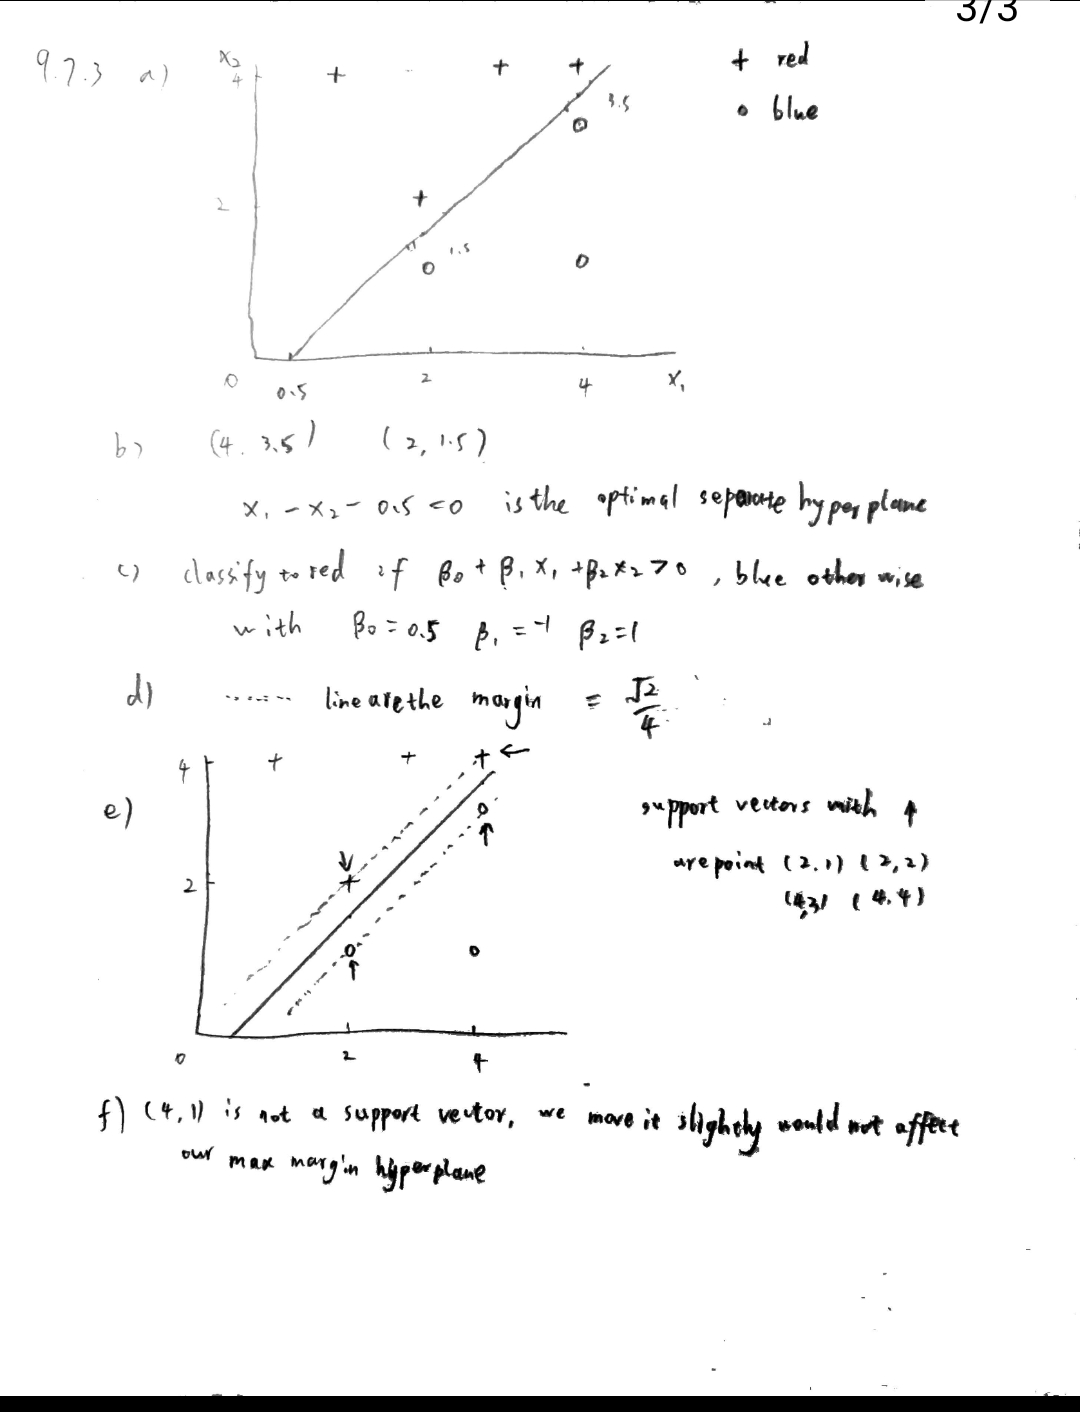

In [37]:
Image("9731.jpg")


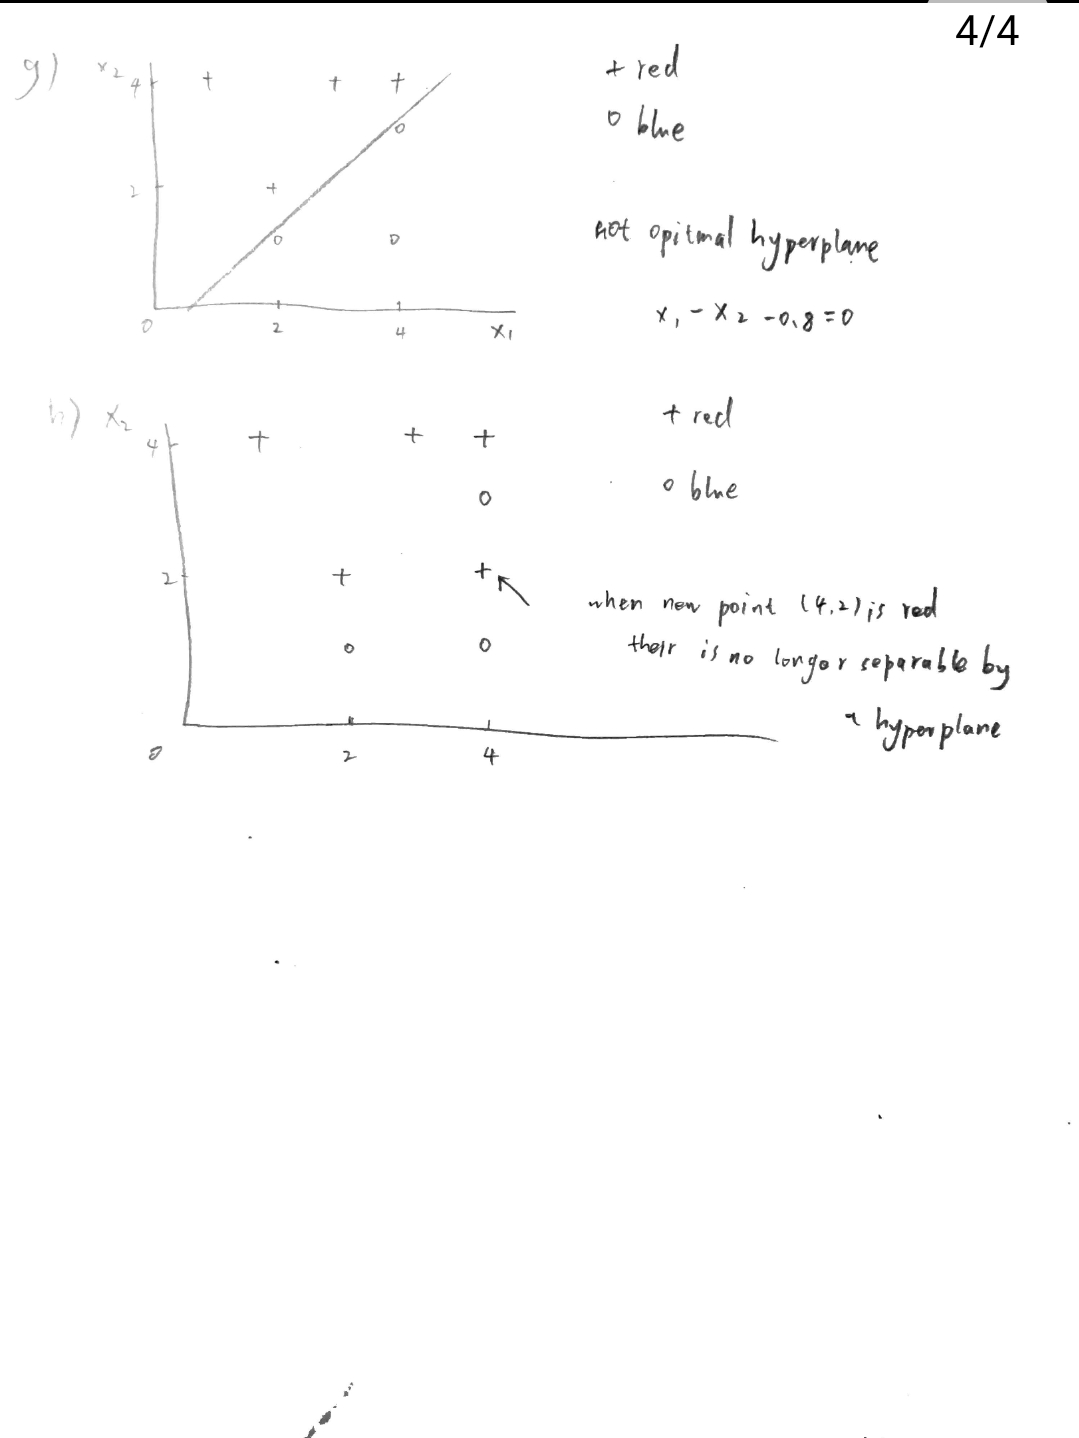

In [38]:
Image("9732.jpg")